Chapter 19

# 自适应梯度下降数值优化
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码实现了**自适应学习率的梯度下降法**，通过引入累积梯度平方的动态调整机制，使学习率能够随迭代过程适应性变化。以下从数学角度详细描述代码的功能、数学公式以及可视化的意义。

---

### 1. **目标函数与梯度**

#### 目标函数
目标函数为一个简单的二次多项式：
$$
f(x) = 2x^2 - 8x + 1
$$
其梯度（导数）为：
$$
f'(x) = \frac{d}{dx}(2x^2 - 8x + 1) = 4x - 8
$$
优化目标是找到函数的最小值点 $x^*$，满足：
$$
f'(x^*) = 0
$$

---

### 2. **自适应学习率方法**

#### 基本思想
自适应学习率方法通过动态调整学习率，使优化在迭代过程中更加稳定，尤其在梯度变化较大的情况下能够自动减小步长。核心思想是利用梯度平方的累积信息来调整学习率。

#### 数学公式
1. **梯度平方累积更新**：
   $$
   r_t = \beta r_{t-1} + (1 - \beta) \cdot [f'(x_t)]^2
   $$
   其中：
   - $r_t$ 是第 $t$ 次迭代的梯度平方累积值；
   - $\beta$ 是动量因子，控制历史梯度平方的衰减速率；
   - $f'(x_t)$ 是当前点的梯度。

2. **动态学习率调整**：
   $$
   \eta_t = \frac{\eta}{\sqrt{r_t} + \epsilon}
   $$
   其中：
   - $\eta$ 是初始学习率；
   - $\sqrt{r_t}$ 的引入避免了梯度过大时的爆炸；
   - $\epsilon$ 是小常数，用于防止分母为零。

3. **梯度下降更新**：
   $$
   x_{t+1} = x_t - \eta_t \cdot f'(x_t)
   $$

#### 收敛条件
- 当两次迭代的变量变化小于容差 $tol$ 时停止：
  $$
  |x_{t+1} - x_t| < tol
  $$
- 或达到最大迭代次数。

---

### 3. **实现过程**

#### 自适应梯度下降函数
`adaptive_gradient_descent_with_sqrt` 实现了上述算法。通过累积梯度平方值 $r_t$ 动态调整学习率，在每次迭代中优化更新路径。

#### 参数说明
- 初始点 $x_0 = 5$；
- 初始学习率 $\eta = 0.6$；
- 动量因子 $\beta = 0.9$。

---

### 4. **可视化自适应梯度下降过程**

#### 可视化内容
函数 `visualize_adaptive_gradient_descent_with_sqrt` 生成三个子图：
1. **目标函数与迭代路径**：
   - 蓝色曲线为目标函数 $f(x)$；
   - 黑色叉点表示每次迭代的点 $(x_t, f(x_t))$；
   - 红色连线显示了点的更新路径。

2. **变量 $x_t$ 的变化**：
   - 横轴为迭代次数，纵轴为 $x_t$ 的值；
   - 曲线反映了 $x_t$ 随着迭代逐步逼近最优解 $x^*$ 的过程。

3. **函数值 $f(x_t)$ 的变化**：
   - 横轴为迭代次数，纵轴为 $f(x_t)$；
   - 曲线展示了目标函数值逐渐减小并收敛到最小值的趋势。

#### 自适应学习率的效果
- 在梯度较大的区域，自适应学习率方法通过减小步长避免了不稳定的震荡；
- 随着梯度逐渐减小，步长逐步增大，使得优化更高效。

---

### 5. **测试与结果**

#### 理论解
目标函数的解析解为：
$$
x^* = \frac{-b}{2a} = \frac{8}{4} = 2
$$
对应的最小值为：
$$
f(x^*) = 2(2)^2 - 8(2) + 1 = -7
$$

#### 实际结果
代码运行结果：
- 自适应梯度下降找到的最优点 $x^* \approx 2$；
- 对应的最小值 $f(x^*) \approx -7$。

结果与理论值完全一致。

---

### 6. **总结与应用**

#### 自适应学习率的优势
- 在梯度变化较大的区域能够自动调整步长，避免了过大的步长导致的发散；
- 避免了学习率 $\eta$ 需要手动调整的问题。

#### 应用场景
自适应梯度下降方法广泛应用于：
- 深度学习优化算法（如 Adagrad、RMSProp 等）；
- 非凸优化问题；
- 高维复杂模型的参数调整。

#### 可视化的意义
通过动态展示迭代路径和收敛行为，可以直观地观察优化过程中学习率的调整效果及其对更新路径的影响。这种自适应方法是机器学习优化领域的重要工具之一。

## 导入包

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, lambdify

## 目标函数

In [2]:
x = symbols('x')
func = 2*x**2 - 8*x + 1
func

2*x**2 - 8*x + 1

In [3]:
grad = diff(func, x)  # 计算函数的一阶导数
grad

4*x - 8

In [4]:
# 将函数和梯度转换为 Python 可执行函数
f = lambdify(x, func, 'numpy')
grad_f = lambdify(x, grad, 'numpy')

## 自适应学习率方法

In [5]:
def adaptive_gradient_descent_with_sqrt(f, grad_f, x0, learning_rate=0.1, beta=0.9, epsilon=1e-8, max_iter=50, tol=1e-6):
    x_vals = [x0]
    r_t = 0  # 初始化累积的梯度平方值
    for _ in range(max_iter):
        grad_val = grad_f(x_vals[-1])  # 当前点的一阶导数
        r_t = beta * r_t + (1 - beta) * (grad_val**2)  # 累积梯度平方值
        adjusted_lr = learning_rate / (np.sqrt(r_t) + epsilon)  # 动态调整学习率
        x_new = x_vals[-1] - adjusted_lr * grad_val  # 按调整后的学习率更新位置
        x_vals.append(x_new)
        if abs(x_new - x_vals[-2]) < tol:  # 如果变化小于容差，停止迭代
            break
    return x_vals

## 可视化自适应学习率过程和收敛

In [6]:
def visualize_adaptive_gradient_descent_with_sqrt(f, x_vals):
    x = np.linspace(-1, 5, 500)  # 设置绘图范围
    y = f(x)

    # 获取收敛的函数值和对应的最小值点
    f_vals = [f(val) for val in x_vals]
    iterations = np.arange(len(x_vals))

    # 创建图像，分三行一列
    fig, axs = plt.subplots(3, 1, figsize=(8, 6), 
                            height_ratios=[2, 1, 1],
                            constrained_layout=True)

    # 图1：目标函数及梯度下降过程
    axs[0].plot(x, y, label="f(x)", color="blue")
    axs[0].scatter(x_vals, f_vals, color="k", marker = 'x', label="Iterations")
    axs[0].plot(x_vals, f_vals, linestyle="-", color="red", alpha=0.6)
    axs[0].set_title("Gradient Descent Optimization")
    axs[0].set_xlabel("x")
    axs[0].set_ylabel("f(x)")
    axs[0].set_xlim(-1,5)
    axs[0].legend()
    axs[0].grid(True)

    # 图2：收敛过程中最小值点的变化
    axs[1].plot(iterations, x_vals, marker="x", label="x value", color="green")
    axs[1].set_xlabel("Iteration")
    axs[1].set_ylabel("Optimized x")
    axs[1].set_xlim(iterations.min(),iterations.max())
    axs[1].set_xticks(np.arange(0, iterations.max(), 2))
    axs[1].legend()
    axs[1].grid(True)

    # 图3：收敛过程中最小值点的变化
    axs[2].plot(iterations, f_vals, marker="x", label="f(x)", color="blue")
    axs[2].set_xlabel("Iteration")
    axs[2].set_ylabel("Optimized min of f(x)")
    axs[2].set_xlim(iterations.min(),iterations.max())
    axs[2].set_xticks(np.arange(0, iterations.max(), 2))
    axs[2].legend()
    axs[2].grid(True)

## 测试自适应学习率

In [7]:
x0 = 5  # 初始点
learning_rate = 0.6
x_vals = adaptive_gradient_descent_with_sqrt(f, grad_f, x0, learning_rate)

In [8]:
print(f"自适应学习率（带开根号）找到的最小值点: {x_vals[-1]}")
print(f"最小值: {f(x_vals[-1])}")

自适应学习率（带开根号）找到的最小值点: 2.0000000092063397
最小值: -7.0


## 可视化

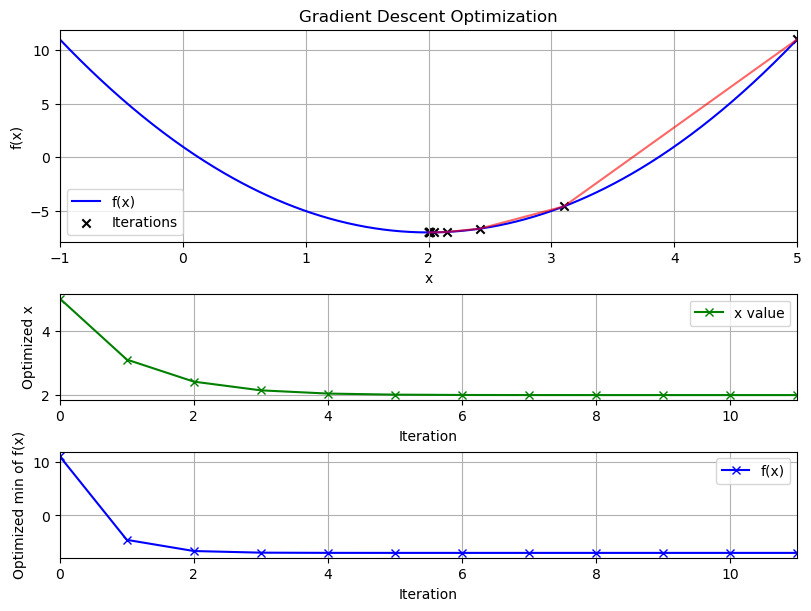

In [9]:
visualize_adaptive_gradient_descent_with_sqrt(f, x_vals)